#**Visualização de Dados**

In [1]:
# Importações
import folium
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import plotly.express as px
import matplotlib.pyplot as plt
from shapely.geometry import Point

In [2]:
#carregando o conjunto de dados
df = pd.read_csv('pinguins_processado.csv',sep=';')

#**Headmps (Mapa de calor)**

In [4]:
# Crie uma tabela de contingência para as colunas 'species' e 'sex'
contingency_table = pd.crosstab(df['species'], df['sex'])
contingency_table

sex,FEMALE,MALE
species,,
ADELIE,73,73
CHINSTRAP,34,34
GENTOO,58,61


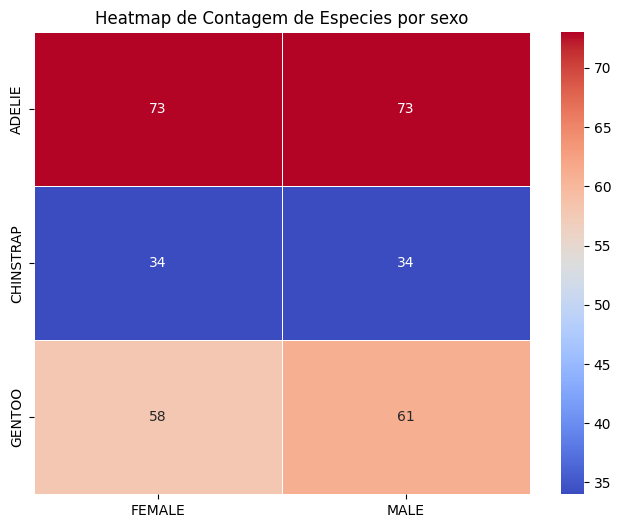

In [8]:
plt.figure(figsize=(8,6))
sns.heatmap(contingency_table, annot = True, cmap = 'coolwarm', fmt= 'd', linewidths=.5)

plt.title('Heatmap de Contagem de Especies por sexo')
plt.xlabel('')
plt.ylabel('')

plt.show()

# **Pair plots (Gráfico aos pares)**

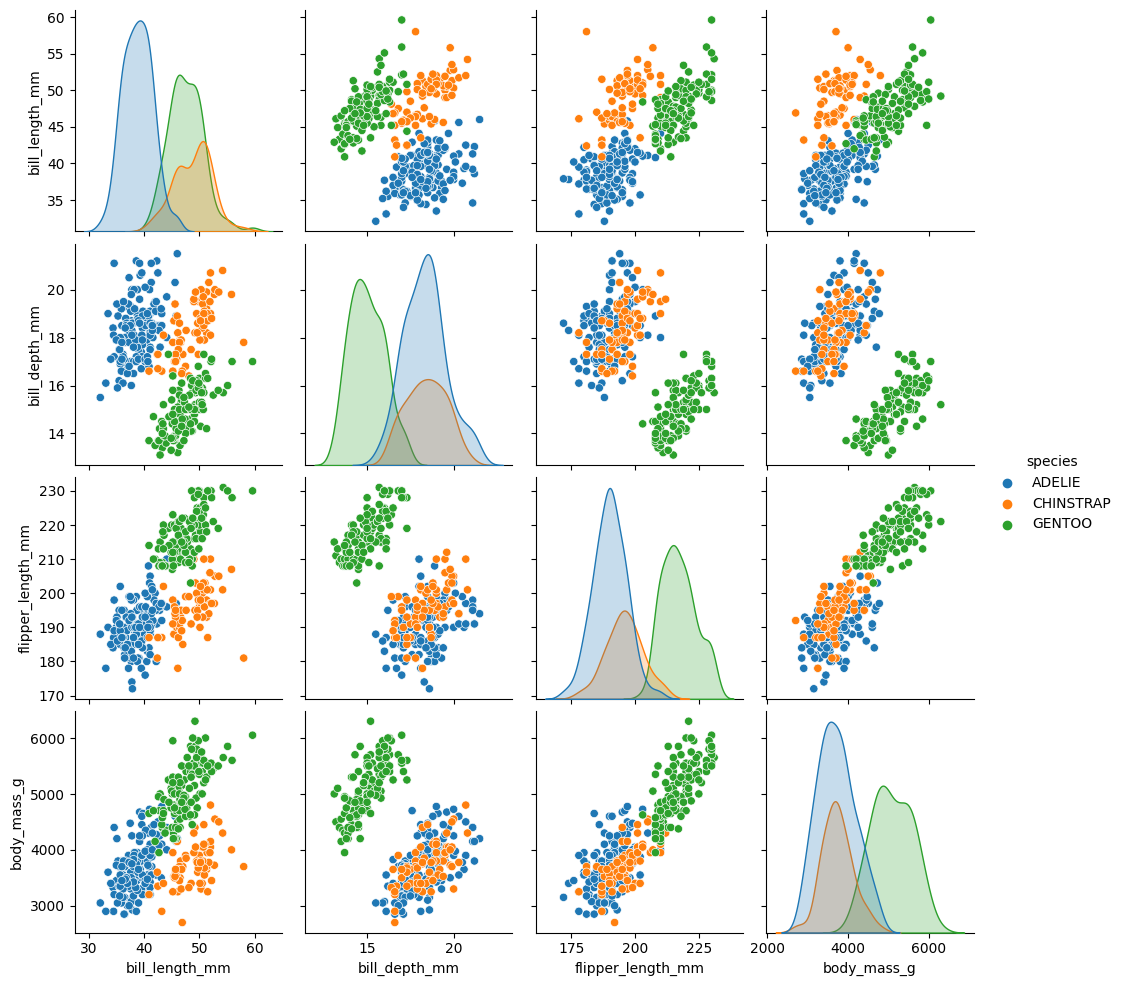

In [7]:
sns.pairplot(df, hue= 'species')

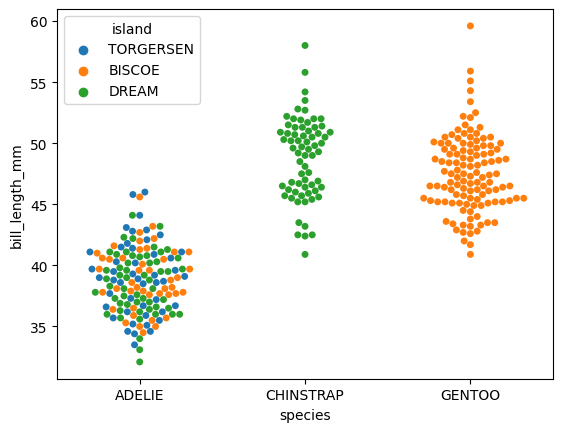

In [6]:
ax = sns.swarmplot(x = df.species, y=df.bill_length_mm,hue=df.island)

# **Mapa**

In [13]:
#dados fornecidos
data = {
    'island': ['BISCOE', 'BISCOE', 'DREAM', 'DREAM', 'TORGERSEN'],
    'species': ['ADELIE', 'GENTOO', 'ADELIE', 'CHINSTRAP', 'ADELIE'],
    'qnt': [44, 119, 55, 68, 47],
    'Island': ['BISCOE', 'BISCOE', 'DREAM', 'DREAM', 'TORGERSEN'],
    'Latitude': [-66.9, -66.9, -62.5, -62.5, -64.8],
    'Longitude': [-68.1, -68.1, -59.8, -59.8, -63.5]
}

#crie um dataframe com os dados fornecidos
data = pd.DataFrame(data)

# Ordene o DataFrame por quantidade de pinguins em ordem decrescente
data = data.sort_values(by='qnt', ascending = False)

# Calcule o zoom inicial para mostrar todas as ilhas
min_lat, max_lat = data['Latitude'].min(), data['Latitude'].max()
min_lon, max_lon = data['Longitude'].min(), data['Longitude'].max()
center_lat = (min_lat + max_lat) / 2
center_lon = (min_lon + max_lon) / 2

# Crie um mapa do Folium
m = folium.Map(location=[center_lat, center_lon], zoom_start=5)  # Zoom inicial ajustado para exibir todas as ilhas

# Dicionário de cores
colors = {'ADELIE': '#9400FF', 'GENTOO': '#176B87', 'CHINSTRAP': '#45FFCA'}

# Função para ajustar o tamanho do círculo com base na quantidade de pinguins
def circle_radius(qnt):
    # Ajuste o tamanho com base na quantidade de pinguins (fator de escala pode ser ajustado conforme necessário)
    scale_factor = 50
    return qnt * scale_factor

# Adicione círculos no mapa para cada espécie nas ilhas (ordenados por quantidade)
for index, row in data.iterrows():
    folium.Circle(
        location=[row['Latitude'], row['Longitude']],
        radius=circle_radius(row['qnt']),
        color=colors[row['species']],
        fill=True,
        fill_color=colors[row['species']],
        fill_opacity=0.5,
        popup=f"Island: {row['island']}<br>Species: {row['species']}<br>Count: {row['qnt']}",
    ).add_to(m)

# Exiba o mapa interativo
m



In [14]:
#calculando a contagem de especies

In [15]:
species_count = df['species'].value_counts().reset_index()
species_count.columns = [ 'species', 'count']

#criando grafico treemap
fig = px.treemap(species_count, path=['species'], values= 'count', title = 'Contagem de Especies de Pinguins')
fig.show()